In [1]:
import sys
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    # montar el drive, que es donde tenemos el dataset
    from google.colab import drive
    drive.mount("/content/drive")
    data_dir = "/content/drive/MyDrive/2023/Publica/Alumnos/"
    sys.path.append(data_dir)
else:
    import os
    data_dir = os.path.dirname(os.path.abspath('Matplotlib')) + "/"

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

filename = data_dir + "global-temperatures.csv"

df = pd.read_csv(filename,
                 parse_dates=["dt"],
                 usecols = ["dt", "LandAverageTemperature"])
df.head()
df.info()

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   dt                      3192 non-null   datetime64[ns]
 1   LandAverageTemperature  3180 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 50.0 KB


,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573
...,...,...
3187,2015-08-01,14.755
3188,2015-09-01,12.999
3189,2015-10-01,10.801
3190,2015-11-01,7.433


In [7]:
df=df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3180 entries, 0 to 3191
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   dt                      3180 non-null   datetime64[ns]
 1   LandAverageTemperature  3180 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 74.5 KB


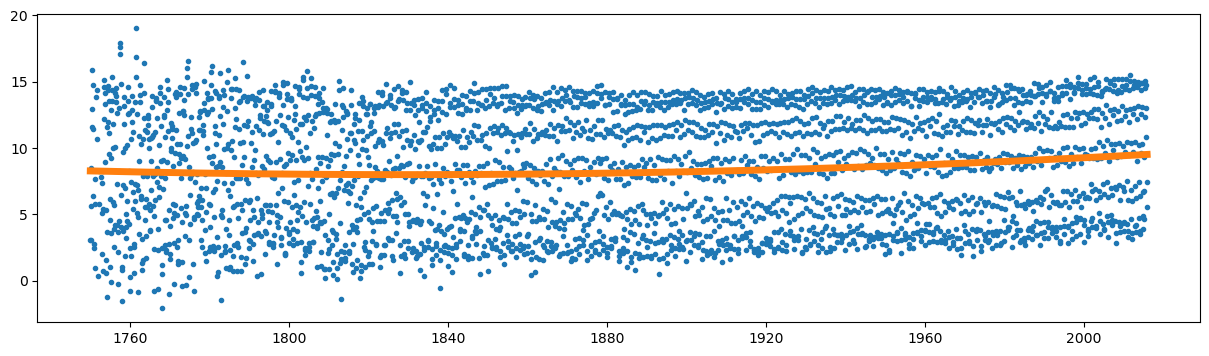

In [11]:
fig, ax = plt.subplots(figsize=(15, 4))
x = df.dt
y = df.LandAverageTemperature

ax.plot(x,y, linestyle= "None", marker=".")

from matplotlib.dates import date2num
x = date2num(x)
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
ax.plot(x, p(x), linewidth=5)